In [1]:
import torch
import torch.nn as nn
import torchvision as tv
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as Func


In [2]:
logostxt=open("d:\\Downloads\\datasets\\carBrandLogos\\archive\\Car_Brand_Logos\\spisok.txt")
logos_list=logostxt.read().split("\n")
#logos_list=['Burger King','KFC','McDonalds','Other','Starbucks','Subway']
logos_list.sort()
CountOfClasses=len(logos_list)
print(CountOfClasses)
logos_list

8


['hyundai',
 'lexus',
 'mazda',
 'mercedes',
 'opel',
 'skoda',
 'toyota',
 'volkswagen']

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device is',device)

device is cpu


In [4]:
path = 'd:\\Downloads\\datasets\\carBrandLogos\\archive\\Car_Brand_Logos\\Train'

In [5]:
transforms=tv.transforms.Compose([
    tv.transforms.Resize((60,60)),
    tv.transforms.ToTensor()
    
])

In [6]:
from matplotlib.transforms import Transform
dataset=tv.datasets.ImageFolder(root=path,transform=transforms)

In [7]:
dataloader=torch.utils.data.DataLoader(dataset,batch_size=16,shuffle=True,num_workers=4)

(tensor([[[0.7961, 0.7961, 0.7961,  ..., 0.7765, 0.7725, 0.7725],
         [0.7961, 0.7961, 0.7961,  ..., 0.7843, 0.7765, 0.7686],
         [0.7961, 0.7961, 0.7961,  ..., 0.7804, 0.7686, 0.7647],
         ...,
         [0.9255, 0.7216, 0.7451,  ..., 0.9725, 0.9725, 0.9882],
         [0.9647, 0.7647, 0.6745,  ..., 0.9137, 0.9137, 0.9804],
         [0.9922, 0.9569, 0.9176,  ..., 0.9882, 0.9922, 0.9961]],

        [[0.8549, 0.8549, 0.8549,  ..., 0.8353, 0.8353, 0.8314],
         [0.8549, 0.8549, 0.8549,  ..., 0.8431, 0.8353, 0.8275],
         [0.8549, 0.8549, 0.8549,  ..., 0.8392, 0.8275, 0.8235],
         ...,
         [0.9451, 0.8235, 0.8431,  ..., 0.9725, 0.9725, 0.9882],
         [0.9765, 0.8431, 0.7843,  ..., 0.9137, 0.9137, 0.9804],
         [0.9882, 0.9765, 0.9529,  ..., 0.9882, 0.9922, 0.9961]],

        [[0.9451, 0.9451, 0.9451,  ..., 0.8980, 0.9098, 0.9216],
         [0.9451, 0.9451, 0.9451,  ..., 0.9059, 0.9098, 0.9176],
         [0.9451, 0.9451, 0.9451,  ..., 0.9020, 0.9020, 0

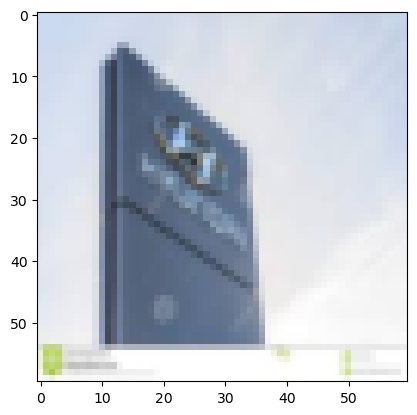

In [8]:
plt.imshow(dataset[118][0].numpy().transpose((1,2,0)))
print(dataset[118])
#print(dataset[50][0].numpy().transpose((1,2,0)).shape)
#print(dataset[50][0].shape)
#m=nn.Conv2d(3,32,kernel_size=3,padding=0)
#m=nn.AdaptiveAvgPool2d((1,1))
#print(m(dataset[50][0]).shape) 
#plt.imshow(m(dataset[50][0]).numpy().transpose((1,2,0)))
#print(dataset[50])

In [11]:
vggNet=tv.models.vgg.vgg19(weights=tv.models.VGG19_Weights)
classifier=nn.Sequential(
    nn.Linear(25088,600),
    nn.ReLU(),
    nn.Linear(600,600),
    nn.ReLU(),
    nn.Linear(600,CountOfClasses)
)
vggNet.classifier=classifier
for param in vggNet.features.parameters():
    param.requires_grad=False
#net = SimpleConvNet()
net=vggNet
net = net.to(device)

C:\Users\lain\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
#loss_fn = nn.CrossEntropyLoss()
loss_fn=nn.MSELoss()
#optimizer=torch.optim.Adam(net.parameters(),lr=1e-4, betas=(0.9, 0.999))
optimizer=torch.optim.Adam(net.classifier.parameters(),lr=1e-4, betas=(0.9, 0.999))
def count_parameters(net):
    return sum(p.numel() for p in net.parameters() if p.requires_grad)
print(count_parameters(net))

15418808


In [13]:
def get_accuracy(pred, label):
    answer =(pred.argmax(1)==label.argmax(1)).type(torch.float).sum().item()

    #answer = pred.detach().numpy().argmax(1) == label.numpy().argmax(1) 
    return answer

In [14]:
net = torch.load('D:\\myprogect\\pytorch\\weightsOfLogoClassifiervggVersion')

In [15]:
# epochs=20
# for epoch in range(epochs):
#     loss_val=0
#     acc_val=0

#     for sample in dataloader:
#         img,label = sample

#         label = label.to(device)
#         label = Func.one_hot(label, num_classes=CountOfClasses).float()
#         # label=Func.one_hot(label,num_classes=10)
#         #label = label.float()
#         #label = label.unsqueeze(1)
#         img = img.to(device)
        
#         optimizer.zero_grad()
       
        
#         pred = net (img)
        
#         loss = loss_fn(pred, label)
#         loss.backward()

#         optimizer.step()
        
#         loss_val+=loss.item()
#         acc_val += get_accuracy(pred.cpu(), label.cpu())

#     loss_val /= len(dataloader)
#     acc_val /= len(dataloader)*16
#     print("epoch=",epoch,"loss=",loss_val ,"accruracy=",acc_val)

In [16]:
torch.save(net, 'D:\\myprogect\\pytorch\\weightsOfLogoClassifiervggVersion')

In [17]:
#net = MyConvModel()
#net = torch.load('D:\\myprogect\\pytorch\\weightsOfLogoClassifierbatch1')
#net.eval()

Test for one image

tensor([[ 0.0603,  0.0603, -0.0177,  1.4142, -0.1748, -0.1569, -0.1304,  0.2251]],
       grad_fn=<AddmmBackward0>)
[0.060297414660453796, 0.060331158339977264, -0.017707040533423424, 1.4142093658447266, -0.17481204867362976, -0.15687842667102814, -0.1303754597902298, 0.22508716583251953]
1.4142093658447266
3
mercedes
1.280152129009366


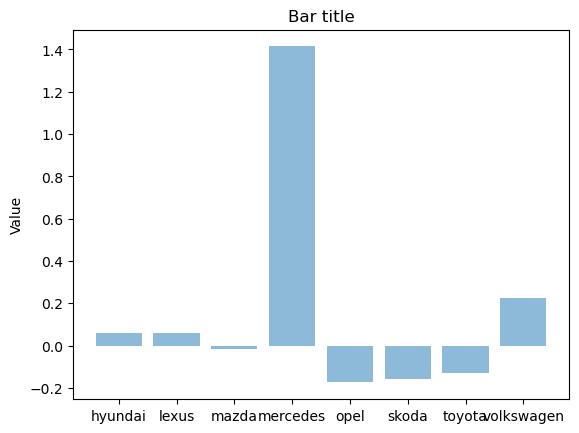

In [18]:

path="d:\\Downloads\\datasets\\carBrandLogos\\archive\\Car_Brand_Logos\\mytest\\2.jpg"
img=Image.open(path)
tensorImg=transforms(img)
batchImg=torch.unsqueeze(tensorImg,0)
out=net(batchImg)
print(out)
test=out
out=out.squeeze()
out=out.tolist()
print(out)
print(max(out))
print(out.index(max(out)))
print(logos_list[out.index(max(out))])
print(sum(out))
y_pos = np.arange(len(logos_list))
plt.bar(y_pos, out, align='center', alpha=0.5)
plt.xticks(y_pos, logos_list)
plt.ylabel('Value')
plt.title('Bar title')

plt.show()
# dataset=tv.datasets.ImageFolder(root=path,transform=transforms)
# #print(dataset[0])
# testloader=torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=True)
# for sample in testloader:
#   img,label = sample
#   img=img.to(device)
#   pred=net(img)
  
#   pred=max(pred).tolist()
#   print(pred)
#   print(pred.index(max(pred)))
#   print(max(pred))
#   print(logos_list[ pred.index(max(pred))])

test for test dataset dataset img =1460

In [19]:
a=np.zeros(CountOfClasses)
path = 'd:\\Downloads\\datasets\\carBrandLogos\\archive\\Car_Brand_Logos\\Test'
dataset=tv.datasets.ImageFolder(root=path,transform=transforms)
dataloader=torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=True)
loss_val=0
acc_val=0
for sample in dataloader:
    img,label = sample

    label = label.to(device)
    label = Func.one_hot(label, num_classes=CountOfClasses).float()
        # label=Func.one_hot(label,num_classes=10)
        #label = label.float()
        #label = label.unsqueeze(1)
    img = img.to(device) 
    pred = net (img)
    out=pred.squeeze()
    out=out.tolist()
    a[out.index(max(out))]+=1
    loss = loss_fn(pred, label)
         
    loss_val+=loss.item()
    acc_val += get_accuracy(pred.cpu(), label.cpu())
    
loss_val /= len(dataloader)
acc_val /= len(dataloader)
print("loss=",loss_val ,"accruracy=",acc_val)
print(a)
print(sum(a))

loss= 0.01536526304410118 accruracy= 0.9832869080779945
[305. 303. 306. 340. 303. 309. 312. 335.]
2513.0


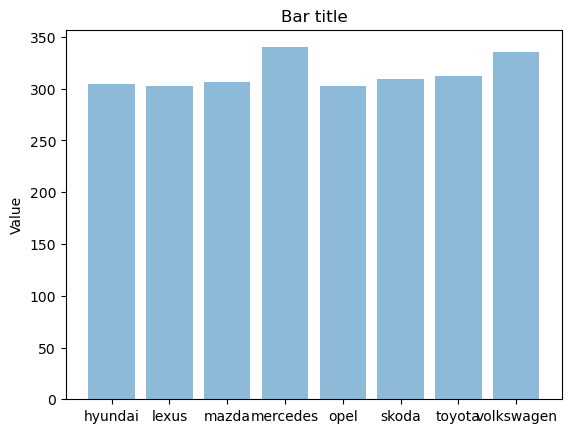

In [20]:
y_pos = np.arange(len(logos_list))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, logos_list)
plt.ylabel('Value')
plt.title('Bar title')

plt.show()

эта хуйня не работает